In [7]:
import pandas as pd

# K-means로 번화가 집단 알아내기

http://m.blog.daum.net/geoscience/1515

In [142]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/jipgag.csv", encoding='utf-8')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,2,A,골목상권,1000010,성균관로5길,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,2020,2,A,골목상권,1000011,숭인동길,17,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0
2,2020,2,A,골목상권,1000012,옥인길,12,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,3.0
3,2020,2,A,골목상권,1000013,율곡로10길,18,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,11.0,NaN,NaN,NaN,NaN,1.0
4,2020,2,A,골목상권,1000014,율곡로16길,4,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


내가 생각하는 번화가의 대표적인 집객 시설은 **백화점**인데, 백화점과 상관관계가 높았던 극장과 은행을 위주로 클러스터링 하는게 좋겠다!

### 필요한 데이터 칼럼만 뽑기

### NaN값(극장과 백화점이 없는 곳) 0으로 처리해주기

In [12]:
data = data.fillna(0)
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,2,A,골목상권,1000010,성균관로5길,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
1,2020,2,A,골목상권,1000011,숭인동길,17,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
2,2020,2,A,골목상권,1000012,옥인길,12,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,3.0
3,2020,2,A,골목상권,1000013,율곡로10길,18,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,1.0
4,2020,2,A,골목상권,1000014,율곡로16길,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 2020년 2분기 코드만 뽑기

In [14]:
data = data[(data['기준_년_코드'] == 2020) & (data['기준_분기_코드'] == 2)]
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,2,A,골목상권,1000010,성균관로5길,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
1,2020,2,A,골목상권,1000011,숭인동길,17,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
2,2020,2,A,골목상권,1000012,옥인길,12,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,3.0
3,2020,2,A,골목상권,1000013,율곡로10길,18,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,1.0
4,2020,2,A,골목상권,1000014,율곡로16길,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
data[['상권_코드_명','백화점_수']].max()

상권_코드_명    흑석시장
백화점_수         1
dtype: object

## 본격 k-means clustering

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
import matplotlib as mpl #파이썬 내의 데이터 활용
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 대처

### Case1: 극장수와 백화점 수로 클러스터링 해보기
data1: 극장 수, 백화점 수 

In [17]:
data1 = data[['상권_코드_명','극장_수','백화점_수']]
data1.head()

,상권_코드_명,극장_수,백화점_수
0,성균관로5길,0.0,0.0
1,숭인동길,0.0,0.0
2,옥인길,2.0,0.0
3,율곡로10길,1.0,0.0
4,율곡로16길,0.0,0.0


In [42]:
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gulim' in f.name] # Gulim 폰트 검색

[('New Gulim', 'C:\\Windows\\Fonts\\NGULIM.TTF'),
 ('Gulim', 'C:\\Windows\\Fonts\\gulim.ttc')]

In [43]:
sns.set(style='whitegrid', font='Gulim', font_scale=1.2) # Seaborn 설정

In [20]:
X = data1.iloc[:,[1,2]].values #x값으로 극장수, 백화점 수 지정
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수(극장수, 백화점 수)

m,n값 확인

In [21]:
m

1462

In [22]:
n

2

<function matplotlib.pyplot.show(*args, **kw)>

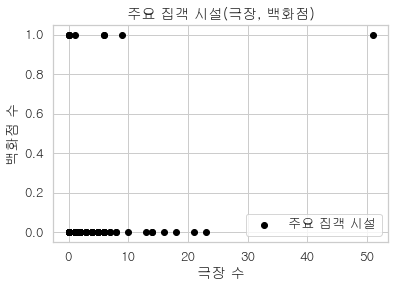

In [23]:
plt.scatter(X[:,0], X[:,1], c='black', label='주요 집객 시설')
plt.xlabel('극장 수')
plt.ylabel('백화점 수')
plt.legend()
plt.title('주요 집객 시설(극장, 백화점)')
plt.show

백화점 자체가 수가 1개 있거나 or 없거나이기 때문에 백화점이 없지만 극장이 많아 번화가로 분류될 수 있는 상권을 놓칠 것 같다

이번엔 극장 수와 은행 수로 살펴보자

### Case2 극장 수와 은행 수로 클러스터링 해보기
data2: 극장 수, 은행 수

In [24]:
data2 = data[['상권_코드_명','극장_수','은행_수']]
data2 = data2[(data2['극장_수']>=1) & (data2['은행_수']>=1)]
data2

,상권_코드_명,극장_수,은행_수
6,자하문로7길,2.0,1.0
17,평창길,4.0,1.0
30,명동길,5.0,4.0
101,성수일로6길,1.0,3.0
146,아차산로78길,1.0,1.0
...,...,...,...
1455,삼청로5길,5.0,1.0
1457,잠실 관광특구,23.0,12.0
1458,강남 마이스 관광특구,6.0,10.0
1459,난계로27길,1.0,1.0


In [55]:
X = data2.iloc[:,[1,2]].values #x값으로 극장수, 백화점 수 지정
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수(극장수, 백화점 수)

<function matplotlib.pyplot.show(*args, **kw)>

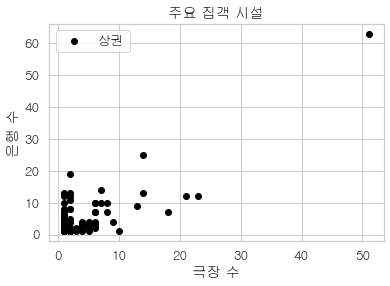

In [56]:
X = data2.iloc[:,[1,2]].values #x값으로 극장수, 백화점 수 지정
plt.scatter(X[:,0], X[:,1], c='black', label='상권')
plt.xlabel('극장 수')
plt.ylabel('은행 수')
plt.legend()
plt.title('주요 집객 시설')
plt.show

그래프를 보면 상관관계가 보이는 것 같다! 즉 극장이 많은 곳엔 은행도 많은 경향이 있는 것 같다.   
더 정확히 알기 위해 상관계수를 구해보자

In [57]:
data2.corr()

,극장_수,은행_수
극장_수,1.000000,0.779179
은행_수,0.779179,1.000000


오호 약 0.69로 상관성이 꽤 높은 것 같다!   
이걸로 클러스터링을 해보자

In [58]:
from sklearn.cluster import KMeans
sns.set(style='whitegrid', font='Gulim', font_scale=1.2) # Seaborn 설정


### 최적의 k값 찾기

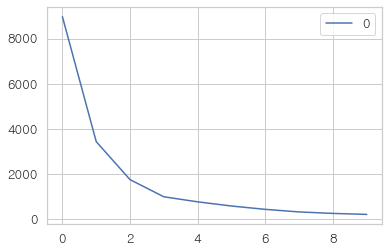

In [59]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

inertia가 작을 수록 좋은 값

군집의 개수가 적당히 작고 inertia가 작을 수록 좋으므로 4가 적당해보인다!

In [60]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 n개로 나누겠다
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 2,
       3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 1, 2, 2, 3, 2, 0, 3, 3])

In [61]:
data2['cluster_id'] = kmeans.labels_
data2

,상권_코드_명,극장_수,은행_수,cluster_id
6,자하문로7길,2.0,1.0,3
17,평창길,4.0,1.0,3
30,명동길,5.0,4.0,3
101,성수일로6길,1.0,3.0,3
146,아차산로78길,1.0,1.0,3
...,...,...,...,...
1455,삼청로5길,5.0,1.0,3
1457,잠실 관광특구,23.0,12.0,2
1458,강남 마이스 관광특구,6.0,10.0,0
1459,난계로27길,1.0,1.0,3


Text(0.5, 1.0, '은행과 극장수로 찾는 번화가')

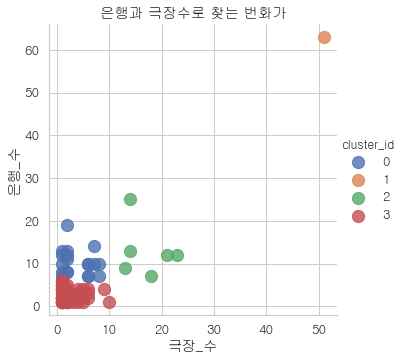

In [62]:
sns.lmplot('극장_수','은행_수', data=data2, fit_reg=False, scatter_kws={"s":150}, hue="cluster_id")
plt.title("은행과 극장수로 찾는 번화가")

### 각 군집별 자세히 살펴보기

In [63]:
data2[data2['cluster_id']==2]

,상권_코드_명,극장_수,은행_수,cluster_id
1171,홍익대학교 주변,13.0,9.0,2
1192,명동거리,21.0,12.0,2
1219,인사동,18.0,7.0,2
1449,동대문패션타운 관광특구,14.0,13.0,2
1450,종로?청계 관광특구,14.0,25.0,2
1457,잠실 관광특구,23.0,12.0,2


In [64]:
data2[data2['cluster_id']==3]

,상권_코드_명,극장_수,은행_수,cluster_id
6,자하문로7길,2.0,1.0,3
17,평창길,4.0,1.0,3
30,명동길,5.0,4.0,3
101,성수일로6길,1.0,3.0,3
146,아차산로78길,1.0,1.0,3
...,...,...,...,...
1299,서울약령시장,1.0,1.0,3
1328,숭인시장,1.0,2.0,3
1455,삼청로5길,5.0,1.0,3
1459,난계로27길,1.0,1.0,3


In [65]:
data2[data2['cluster_id']==0]

,상권_코드_명,극장_수,은행_수,cluster_id
1015,가산디지털단지역_3,1.0,8.0,0
1051,서울 강남구 강남역_1,1.0,12.0,0
1073,서울 서초구 강남역,1.0,13.0,0
1076,삼성역_1,2.0,12.0,0
1091,코엑스,6.0,10.0,0
1099,잠실역,1.0,10.0,0
1123,서울 영등포구 여의도역_2,2.0,19.0,0
1124,신사동 가로수길,7.0,14.0,0
1129,서울 강남구 압구정역,2.0,13.0,0
1130,압구정 로데오거리_2,8.0,10.0,0


In [40]:
data2[data2['cluster_id']==1]

,상권_코드_명,극장_수,은행_수,cluster_id
1448,명동 남대문 북창동 다동 무교동 관광특구,51.0,63.0,1


## 주거지역 vs 그 외

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
import matplotlib as mpl #파이썬 내의 데이터 활용
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 대처

fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gulim' in f.name] # Gulim 폰트 검색

from sklearn.cluster import KMeans
sns.set(style='whitegrid', font='Gulim', font_scale=1.2) # Seaborn 설정


In [113]:
import pandas as pd

In [114]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/서울시 우리마을가게 상권분석서비스(상권_상주인구).csv", encoding='utf-8')
data

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권 코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,...,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수,상권 코드 명
0,2020,2,U,관광특구,1001496,24,16,8,6,2,...,2,1,1,2,0,2,13,0,13,강남 마이스 관광특구
1,2020,2,U,관광특구,1001495,8221,3708,4513,822,1679,...,397,1040,1160,628,497,791,4837,0,4837,잠실 관광특구
2,2020,2,U,관광특구,1001494,1924,1274,650,49,195,...,21,60,65,64,130,310,1503,0,1503,종로?청계 관광특구
3,2020,2,U,관광특구,1001493,2427,1146,1281,169,505,...,97,312,290,179,178,225,1529,0,1529,동대문패션타운 관광특구
4,2020,2,U,관광특구,1001492,1104,401,703,15,51,...,12,26,54,120,149,342,510,0,510,명동 남대문 북창동 다동 무교동 관광특구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36851,2014,2,A,골목상권,1000005,680,348,332,108,113,...,36,44,36,102,77,37,0,0,0,백석동길
36852,2014,2,A,골목상권,1000004,715,366,349,25,353,...,12,168,51,65,42,11,0,0,0,명륜길
36853,2014,2,A,골목상권,1000003,761,463,298,44,79,...,23,36,37,37,75,90,0,0,0,돈화문로11가길
36854,2014,2,A,골목상권,1000002,553,290,263,63,89,...,27,45,45,40,45,61,0,0,0,난계로27길


In [115]:
data = data[(data['기준_년_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권 코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,...,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수,상권 코드 명
5927,2019,2,U,관광특구,1001496,26,17,9,7,2,...,2,1,1,3,1,1,15,0,15,강남 마이스 관광특구


In [116]:
data = data[['상권 코드','상권 코드 명','총 상주인구 수']]
data.head(1)

,상권 코드,상권 코드 명,총 상주인구 수
5927,1001496,강남 마이스 관광특구,26


In [117]:
data_udong = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/상권 내 유동인구_우리마을가게 상권분석서비스.csv", encoding='utf-8')
data_udong.head(1)

,기준 년코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,총_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,2020,2,관광특구,강남 마이스 관광특구,90544,5320,18099,20800,21482,19681,5161,14459,14561,14670,14736,14524,9591,8002


In [118]:
data_udong= data_udong[(data_udong['기준 년코드'] == 2019) & (data_udong['기준_분기_코드'] == 2)]
data_udong.head(1)

,기준 년코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,총_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
5980,2019,2,관광특구,강남 마이스 관광특구,118702,6781,21336,27552,29107,26625,7300,16187,17309,18065,19075,19479,15385,13202


In [121]:
data_udong['주말유동인구비율'] = (data_udong['토요일_유동인구_수']+data_udong['일요일_유동인구_수'])/data_udong['총_유동인구_수']

In [122]:
data_udong.head(1)

,기준 년코드,기준_분기_코드,상권_구분_코드_명,상권_코드_명,총_유동인구_수,시간대_1_유동인구_수,시간대_2_유동인구_수,시간대_3_유동인구_수,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,주말유동인구비율
5980,2019,2,관광특구,강남 마이스 관광특구,118702,6781,21336,27552,29107,26625,7300,16187,17309,18065,19075,19479,15385,13202,0.24083


In [123]:
data_udong = data_udong[['기준 년코드','기준_분기_코드','상권_코드_명','주말유동인구비율']]
data_udong

,기준 년코드,기준_분기_코드,상권_코드_명,주말유동인구비율
5980,2019,2,강남 마이스 관광특구,0.240830
5981,2019,2,잠실 관광특구,0.292047
5982,2019,2,종로?청계 관광특구,0.218726
5983,2019,2,동대문패션타운 관광특구,0.224782
5984,2019,2,명동 남대문 북창동 다동 무교동 관광특구,0.186450
...,...,...,...,...
7470,2019,2,백석동길,0.297186
7471,2019,2,명륜길,0.261991
7472,2019,2,돈화문로11가길,0.246288
7473,2019,2,난계로27길,0.282948


In [124]:
data_udong.columns = ['년도','분기','상권 코드 명','주말유동인구비율']

In [125]:
data_udong

,년도,분기,상권 코드 명,주말유동인구비율
5980,2019,2,강남 마이스 관광특구,0.240830
5981,2019,2,잠실 관광특구,0.292047
5982,2019,2,종로?청계 관광특구,0.218726
5983,2019,2,동대문패션타운 관광특구,0.224782
5984,2019,2,명동 남대문 북창동 다동 무교동 관광특구,0.186450
...,...,...,...,...
7470,2019,2,백석동길,0.297186
7471,2019,2,명륜길,0.261991
7472,2019,2,돈화문로11가길,0.246288
7473,2019,2,난계로27길,0.282948


In [126]:
data = pd.merge(data, data_udong, how='inner', on='상권 코드 명')
data.head()

,상권 코드,상권 코드 명,총 상주인구 수,년도,분기,주말유동인구비율
0,1001496,강남 마이스 관광특구,26,2019,2,0.240830
1,1001495,잠실 관광특구,7083,2019,2,0.292047
2,1001494,종로?청계 관광특구,1930,2019,2,0.218726
3,1001493,동대문패션타운 관광특구,2012,2019,2,0.224782
4,1001492,명동 남대문 북창동 다동 무교동 관광특구,1118,2019,2,0.186450


In [129]:
data = data[['상권 코드 명','총 상주인구 수','주말유동인구비율']]

In [130]:
data

,상권 코드 명,총 상주인구 수,주말유동인구비율
0,강남 마이스 관광특구,26,0.240830
1,잠실 관광특구,7083,0.292047
2,종로?청계 관광특구,1930,0.218726
3,동대문패션타운 관광특구,2012,0.224782
4,명동 남대문 북창동 다동 무교동 관광특구,1118,0.186450
...,...,...,...
1476,백석동길,1694,0.297186
1477,명륜길,1453,0.261991
1478,돈화문로11가길,1214,0.246288
1479,난계로27길,841,0.282948


In [131]:
X = data.iloc[:,[1,2]].values #x값으로 상주인구, 유동인구
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수

<function matplotlib.pyplot.show(*args, **kw)>

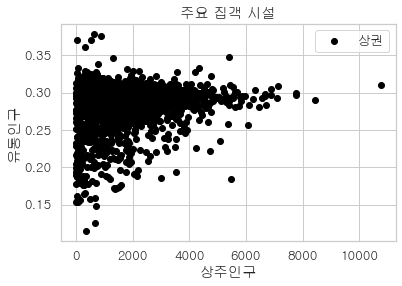

In [132]:
X = data.iloc[:,[1,2]].values 
plt.scatter(X[:,0], X[:,1], c='black', label='상권')
plt.xlabel('상주인구')
plt.ylabel('유동인구')
plt.legend()
plt.title('주요 집객 시설')
plt.show

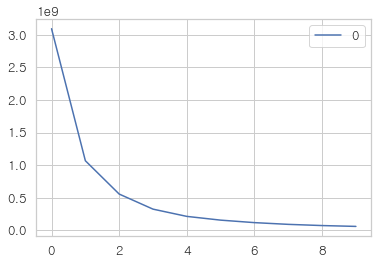

In [133]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

In [134]:
kmeans = KMeans(n_clusters=6).fit(X) #군집 n개로 나누겠다
kmeans.labels_

array([5, 4, 3, ..., 1, 1, 3])

In [135]:
data

,상권 코드 명,총 상주인구 수,주말유동인구비율
0,강남 마이스 관광특구,26,0.240830
1,잠실 관광특구,7083,0.292047
2,종로?청계 관광특구,1930,0.218726
3,동대문패션타운 관광특구,2012,0.224782
4,명동 남대문 북창동 다동 무교동 관광특구,1118,0.186450
...,...,...,...
1476,백석동길,1694,0.297186
1477,명륜길,1453,0.261991
1478,돈화문로11가길,1214,0.246288
1479,난계로27길,841,0.282948


In [136]:
data['cluster_id'] = kmeans.labels_
data

,상권 코드 명,총 상주인구 수,주말유동인구비율,cluster_id
0,강남 마이스 관광특구,26,0.240830,5
1,잠실 관광특구,7083,0.292047,4
2,종로?청계 관광특구,1930,0.218726,3
3,동대문패션타운 관광특구,2012,0.224782,3
4,명동 남대문 북창동 다동 무교동 관광특구,1118,0.186450,1
...,...,...,...,...
1476,백석동길,1694,0.297186,3
1477,명륜길,1453,0.261991,1
1478,돈화문로11가길,1214,0.246288,1
1479,난계로27길,841,0.282948,1


Text(0.5, 1.0, '주거지 vs 그 외')

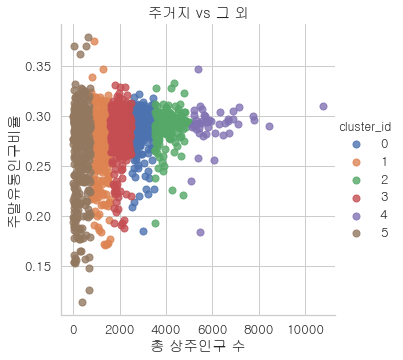

In [138]:
sns.lmplot('총 상주인구 수','주말유동인구비율', data=data, fit_reg=False, scatter_kws={"s":50}, hue="cluster_id")
plt.title("주거지 vs 그 외")

# 집객시설과 상주인구로 K-means

data1 : 집객 시설 데이터

In [170]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/jipgag.csv", encoding='utf-8')
data = data.fillna(0)
data['백화점은행수'] = data['백화점_수']+data['은행_수']
data1 = data[(data['기준_년_코드'] == 2019) & (data['기준_분기_코드'] == 2)]


data1 = data1[['상권_코드_명','백화점은행수']]
data1.columns = ['상권 코드 명','백화점은행수']

data2 : 상주인구 데이터

In [171]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/서울시 우리마을가게 상권분석서비스(상권_상주인구).csv", encoding='utf-8')
data = data[(data['기준_년_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data2 = data[['상권 코드','상권 코드 명','총 상주인구 수']]

data1과 data2합치기

In [172]:
data = pd.merge(data1, data2, how='inner', on='상권 코드 명')
data[['상권 코드 명','백화점은행수','총 상주인구 수']]

,상권 코드 명,백화점은행수,총 상주인구 수
0,장한로14길,0.0,1457
1,명동 남대문 북창동 다동 무교동 관광특구,64.0,1118
2,이태원 관광특구,7.0,5396
3,길동복조리시장,0.0,3178
4,둔촌역전통시장,1.0,613
...,...,...,...
1444,중앙로47길,0.0,1901
1445,창신5길,0.0,1293
1446,양지길,0.0,1787
1447,통일로12길,0.0,925


그래프를 그려보자

<function matplotlib.pyplot.show(*args, **kw)>

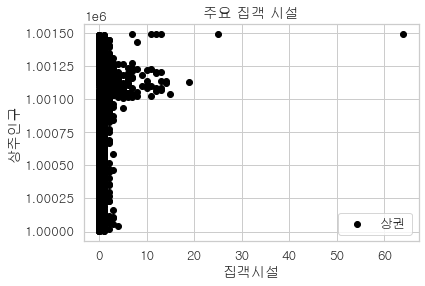

In [173]:
X = data.iloc[:,[1,2]].values #x값으로 상주인구, 유동인구
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수
X = data.iloc[:,[1,2]].values 
plt.scatter(X[:,0], X[:,1], c='black', label='상권')
plt.xlabel('집객시설')
plt.ylabel('상주인구')
plt.legend()
plt.title('주요 집객 시설')
plt.show

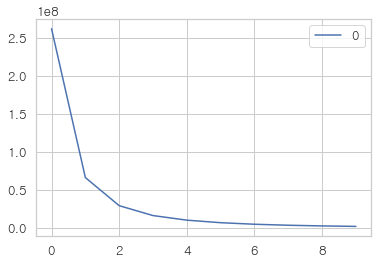

In [174]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

In [175]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 n개로 나누겠다
kmeans.labels_
data['cluster_id'] = kmeans.labels_
data

,상권 코드 명,백화점은행수,상권 코드,총 상주인구 수,cluster_id
0,장한로14길,0.0,1000195,1457,3
1,명동 남대문 북창동 다동 무교동 관광특구,64.0,1001492,1118,0
2,이태원 관광특구,7.0,1001491,5396,0
3,길동복조리시장,0.0,1001490,3178,0
4,둔촌역전통시장,1.0,1001489,613,0
...,...,...,...,...,...
1444,중앙로47길,0.0,1000546,1901,1
1445,창신5길,0.0,1000023,1293,3
1446,양지길,0.0,1000841,1787,2
1447,통일로12길,0.0,1000025,925,3


Text(0.5, 1.0, '주거지 vs 그 외')

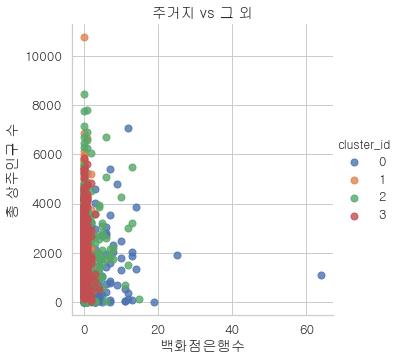

In [178]:
sns.lmplot('백화점은행수','총 상주인구 수', data=data, fit_reg=False, scatter_kws={"s":50}, hue="cluster_id")
plt.title("주거지 vs 그 외")

In [179]:
data.corr()

,백화점은행수,상권 코드,총 상주인구 수,cluster_id
백화점은행수,1.000000,0.253478,-0.081447,-0.182099
상권 코드,0.253478,1.000000,-0.338793,-0.772001
총 상주인구 수,-0.081447,-0.338793,1.000000,0.319871
cluster_id,-0.182099,-0.772001,0.319871,1.000000


## 상주인구, 직장인구로 K-means

직장인구 수 

In [192]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/상권 내 직장인구_우리마을가게 상권분석서비스.csv", encoding='utf-8')
data = data[(data['기준_년월_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data1 = data[['상권_코드_명','총_직장_인구_수']]
data1.columns = ['상권 코드 명', '직장인구']

상주인구 수 

In [196]:
data = pd.read_csv("D:/데잇걸즈/covid-data/상권별_정보/서울시 우리마을가게 상권분석서비스(상권_상주인구).csv", encoding='utf-8')
data = data[(data['기준_년_코드'] == 2019) & (data['기준_분기_코드'] == 2)]
data2 = data[['상권 코드 명','총 상주인구 수']]
data2.columns = ['상권 코드 명', '상주인구']

데이터 합치기

In [197]:
data = pd.merge(data1, data2, how='inner', on='상권 코드 명')
data[['상권 코드 명','직장인구','상주인구']]

,상권 코드 명,직장인구,상주인구
0,강남 마이스 관광특구,18430,26
1,잠실 관광특구,26843,7083
2,종로?청계 관광특구,24700,1930
3,동대문패션타운 관광특구,6683,2012
4,명동 남대문 북창동 다동 무교동 관광특구,133878,1118
...,...,...,...
1475,백석동길,1686,1694
1476,명륜길,42,1453
1477,돈화문로11가길,3804,1214
1478,난계로27길,348,841


<function matplotlib.pyplot.show(*args, **kw)>

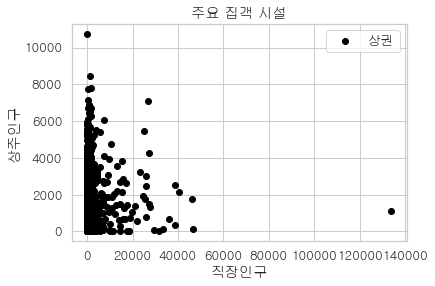

In [198]:
X = data.iloc[:,[1,2]].values #x값으로 상주인구, 유동인구
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수
X = data.iloc[:,[1,2]].values 
plt.scatter(X[:,0], X[:,1], c='black', label='상권')
plt.xlabel('직장인구')
plt.ylabel('상주인구')
plt.legend()
plt.title('주요 집객 시설')
plt.show

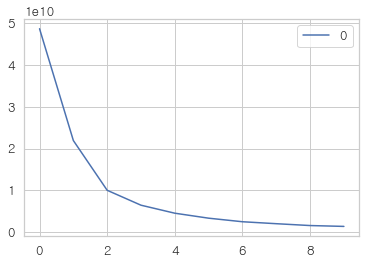

In [199]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

In [200]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 n개로 나누겠다
kmeans.labels_
data['cluster_id'] = kmeans.labels_
data

,상권 코드 명,직장인구,상주인구,cluster_id
0,강남 마이스 관광특구,18430,26,3
1,잠실 관광특구,26843,7083,1
2,종로?청계 관광특구,24700,1930,1
3,동대문패션타운 관광특구,6683,2012,3
4,명동 남대문 북창동 다동 무교동 관광특구,133878,1118,2
...,...,...,...,...
1475,백석동길,1686,1694,0
1476,명륜길,42,1453,0
1477,돈화문로11가길,3804,1214,0
1478,난계로27길,348,841,0


Text(0.5, 1.0, '주거지 vs 그 외')

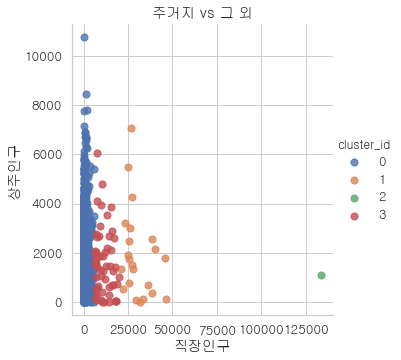

In [201]:
sns.lmplot('직장인구','상주인구', data=data, fit_reg=False, scatter_kws={"s":50}, hue="cluster_id")
plt.title("주거지 vs 그 외")